In [1]:
#pip install scipy

In [2]:
#16
from scipy import stats

In [3]:
l = [15, 12.1, 20, 24.2, 18.7]
m = [800, 495, 302, 1001, 256]

round(stats.pearsonr(l, m)[0], 2)

0.28

In [4]:
#17
import pandas as pd

In [5]:
data = pd.read_csv('moscow_flats.csv', sep='\t')
data.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [6]:
data.shape

(2040, 11)

In [7]:
data_metro = data[data['walk'] == 1]
data_metro.shape

(1399, 11)

In [8]:
data_metro.groupby('metrdist')['price'].mean()

metrdist
1     171.358974
2     151.571429
3     152.896552
4     153.500000
5     137.107143
6     141.666667
7     124.819149
8     130.666667
9      90.000000
10    126.884793
12    116.233333
15    122.931937
20    137.333333
Name: price, dtype: float64

In [9]:
data_metro.groupby('metrdist')['price'].mean().min()

90.0

In [10]:
int(round(data_metro.groupby('metrdist')['price'].mean().max(), 0))

171

In [11]:
len(data_metro.groupby('metrdist')['price'].mean())

13

In [12]:
import matplotlib.pyplot as plt

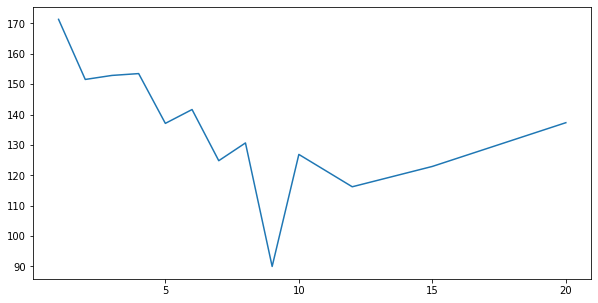

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.locator_params(integer=True)
plt.plot(data_metro.groupby('metrdist')['price'].mean());

In [14]:
#18
df = pd.read_csv('mcdonalds.csv')
df.head()

,category,item,calories,total_fat,calcium,sugars,protein
0,Breakfast,Egg McMuffin,300,20,25,3,17
1,Breakfast,Egg White Delight,250,12,25,3,18
2,Breakfast,Sausage McMuffin,370,35,25,2,14
3,Breakfast,Sausage McMuffin with Egg,450,43,30,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,25,2,21


In [15]:
print(df.category.unique())

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']


In [16]:
df.shape

(260, 7)

In [17]:
df.sugars.max() - df.sugars.min()

128

In [18]:
df.protein.quantile(0.75) - df.protein.quantile(0.25)

15.0

In [19]:
df.total_fat.median()

17.0

In [20]:
df.total_fat.quantile(0.50)

17.0

In [21]:
round(df.calories.std(), 2) #STandard Deviation

240.27

In [22]:
#19
round(df[df['category'] == 'Breakfast'].calories.mean(), 2)

526.67

In [23]:
round(df[df['category'] == 'Chicken & Fish'].calcium.std(), 2)

8.55

In [24]:
df.calories.max()

1880

In [25]:
df[df.calories == 1880]

,category,item,calories,total_fat,calcium,sugars,protein
82,Chicken & Fish,Chicken McNuggets (40 piece),1880,182,8,1,87


In [26]:
df.groupby('category')['calories'].max()

category
Beef & Pork            750
Beverages              280
Breakfast             1150
Chicken & Fish        1880
Coffee & Tea           760
Desserts               340
Salads                 450
Smoothies & Shakes     930
Snacks & Sides         510
Name: calories, dtype: int64

In [27]:
df.groupby('category')['calories'].min()

category
Beef & Pork           240
Beverages               0
Breakfast             150
Chicken & Fish        190
Coffee & Tea            0
Desserts               45
Salads                140
Smoothies & Shakes    210
Snacks & Sides         15
Name: calories, dtype: int64

In [28]:
df.groupby('category')['calories'].max() - \
df.groupby('category')['calories'].min()

category
Beef & Pork            510
Beverages              280
Breakfast             1000
Chicken & Fish        1690
Coffee & Tea           760
Desserts               295
Salads                 310
Smoothies & Shakes     720
Snacks & Sides         495
Name: calories, dtype: int64

In [29]:
#20
count = 0
for item in df['item']:
    if 'Cheese' in item:
        count += 1
print(count)        

16


In [30]:
df.calories.std()

240.26988649145852

In [31]:
df[df['calories'] == 1880]

,category,item,calories,total_fat,calcium,sugars,protein
82,Chicken & Fish,Chicken McNuggets (40 piece),1880,182,8,1,87


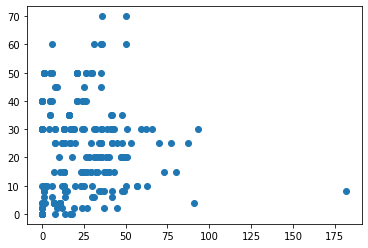

In [32]:
#21
#plt.bar(df.total_fat, df.calcium) напоминание про такой тип графика гистограмма
plt.scatter(df.total_fat, df.calcium);

#График рассеяния/ Точечный график = plt.scatter
#Круговая диаграмма - plt.pie()
#Линейный график - plt.plot()

#sns.boxplot() import seaborn as sns ящик-с-усами

In [33]:
#22
right = df.calories.mean() + 2 * df.calories.std()
left = df.calories.mean() - 2 * df.calories.std()

df[(df.calories >= right) | (df.calories <= left)]
#df[() & ()] логическое "И"

,category,item,calories,total_fat,calcium,sugars,protein
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),1090,87,25,17,36
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150,93,30,17,36
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,990,70,25,17,35
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,1050,77,25,18,35
81,Chicken & Fish,Chicken McNuggets (20 piece),940,91,4,0,44
82,Chicken & Fish,Chicken McNuggets (40 piece),1880,182,8,1,87
246,Smoothies & Shakes,Strawberry Shake (Large),850,36,70,123,18
249,Smoothies & Shakes,Chocolate Shake (Large),850,36,60,120,19
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),930,50,70,128,20


In [34]:
df[(df.calories >= right) | (df.calories <= left)].shape[0]

9

In [35]:
#23
import numpy as np #NUMerical PYthon
#построим сводную таблицу
#1й аргумент – датафрейм
#2й – ряды
#3й – колонки/столбцы
#4й - аггрегирующая (объединяющая) функция (среднее, максимум)
pd.pivot_table(df, index='category', 
               values='protein',
              aggfunc={'protein' : np.mean})

,protein
category,
Beef & Pork,27.333333
Beverages,1.333333
Breakfast,19.857143
Chicken & Fish,29.111111
Coffee & Tea,8.863158
Desserts,4.000000
Salads,19.833333
Smoothies & Shakes,10.857143
Snacks & Sides,8.384615


In [36]:
#24
print('total_fat', round(stats.pearsonr(df.calories, df.total_fat)[0], 2))
print('calcium', round(stats.pearsonr(df.calories, df.calcium)[0], 2))
print('sugars', round(stats.pearsonr(df.calories, df.sugars)[0], 2))
print('protein', round(stats.pearsonr(df.calories, df.protein)[0], 2))

total_fat 0.9
calcium 0.43
sugars 0.26
protein 0.79


In [37]:
#1 Африка

#2 - В популяции морковок самая маленькая разница между ее 
# минимальным и максимальным значением
# - В 1910 году популяция зайцев была больше популяции рысей

#3 Столбчатая диаграмма (bar chart)

#4 Разница между медианой и средним значением для численности рысей 
#  может свидетельствовать о том, что в некоторые годы численность 
#  популяции рысей была экстремально высокой.

#5 Соотнесите типы данных

#6 Мода

#7 Возраст владельцев домохозяйств

#8 0.1 % взрослых женщин весит больше 86 кг.

#9 Было опрошено такое количество женщин из каждого региона, 
#  которое соответствует доле женщин, проживающих в этом регионе 
#  согласно переписи населения.

#10 0.41

#11 Если у сотрудника повышается продуктивность, то, 
# скорее всего, повысится и удовлетворенность работой.

#12 soup.find_all('div', {'class':'person_info'})

#13 page = requests.get(link).text

#14 "\D" – любой символ, кроме цифры, "\d" – цифра.
# Правильный ответ:
# "a1a"

#15 "ab", "cd"